In [1]:
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Basic perceptron gate using sigmoid
def perceptron_gate(x1, x2, w, b):
    return sigmoid(np.dot(w, [x1, x2]) + b)

# Define gates
def AND(x1, x2):
    return perceptron_gate(x1, x2, w=[10, 10], b=-15)

def OR(x1, x2):
    return perceptron_gate(x1, x2, w=[10, 10], b=-5)

def NAND(x1, x2):
    return perceptron_gate(x1, x2, w=[-10, -10], b=15)

# XOR gate using combination of gates
def XOR(x1, x2):
    out1 = OR(x1, x2)
    out2 = NAND(x1, x2)
    return AND(out1, out2)

# Test all combinations
def test_gate(gate_func, name):
    print(f"Testing {name} gate:")
    for x1 in [0, 1]:
        for x2 in [0, 1]:
            out = gate_func(x1, x2)
            print(f"{x1}, {x2} => {round(out)}")

test_gate(XOR, "XOR")


Testing XOR gate:
0, 0 => 0
0, 1 => 1
1, 0 => 1
1, 1 => 0


Epoch 0 Loss: 0.3121
Epoch 3000 Loss: 0.0019
Epoch 6000 Loss: 0.0008
Epoch 9000 Loss: 0.0005
Epoch 12000 Loss: 0.0003
Epoch 15000 Loss: 0.0003
Epoch 18000 Loss: 0.0002

Final Predictions:
[0 0] -> Predicted: 0, Actual: 0
[0 1] -> Predicted: 1, Actual: 1
[1 0] -> Predicted: 1, Actual: 1
[1 1] -> Predicted: 0, Actual: 0


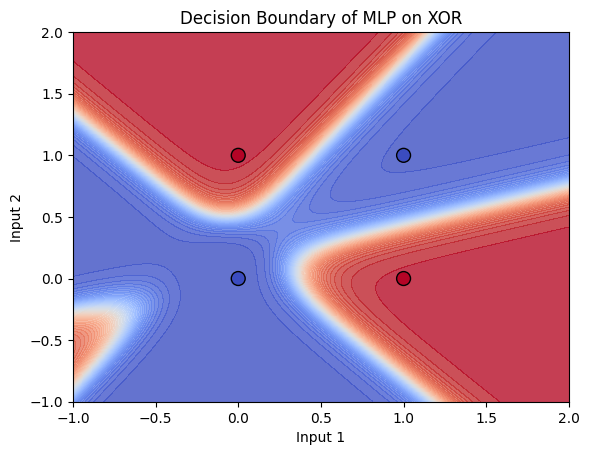

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1 - np.square(x)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
input_size = 2
hidden_size = 4
output_size = 1
lr = 0.1
epochs = 20000

# Initialize weights and biases
np.random.seed(1)
w1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, w1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, w2) + b2
    output = sigmoid(z2)

    # Loss and derivatives
    loss = y - output
    d_output = loss * sigmoid_deriv(output)

    error_hidden = d_output @ w2.T
    d_hidden = error_hidden * tanh_deriv(a1)

    # Update weights and biases
    w2 += a1.T @ d_output * lr
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr
    w1 += X.T @ d_hidden * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    # Track loss
    if epoch % 3000 == 0:
        mse = np.mean(np.square(loss))
        losses.append(mse)
        print(f"Epoch {epoch} Loss: {mse:.4f}")

# Test predictions
print("\nFinal Predictions:")
for i in range(4):
    z1 = X[i] @ w1 + b1
    a1 = tanh(z1)
    z2 = a1 @ w2 + b2
    o = sigmoid(z2)
    print(f"{X[i]} -> Predicted: {round(o.item())}, Actual: {y[i][0]}")


# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1, 2, 300), np.linspace(-1, 2, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
z1 = grid @ w1 + b1
a1 = tanh(z1)
z2 = a1 @ w2 + b2
preds = sigmoid(z2).reshape(xx.shape)

plt.contourf(xx, yy, preds, levels=50, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='coolwarm', edgecolors='k', s=100)
plt.title("Decision Boundary of MLP on XOR")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define weights for each layer
W1 = np.array([[1, -2, 3, 0], [0, 1, -1, 2], [2, -1, 1, 1]])
W2 = np.array([[2, 0, -1, 1], [-1, 3, 1, 0], [1, -2, 2, -1], [0, 1, 3, 2]])
W3 = np.array([[1, -1, 2], [0, 2, -1], [-2, 1, 0], [1, 0, 1]])

# Define input vector
x_in = np.array([0.6, 0.9, 0.1])
print("Input vector:", x_in)


Input vector: [0.6 0.9 0.1]


In [9]:
import numpy as np

# Input matrix: 7 samples, 3 features each
x_inputs = np.array([
    [0.7, 0.3, 0.5],
    [0.2, 0.9, 0.4],
    [0.1, 0.2, 0.8],
    [0.6, 0.7, 0.3],
    [0.5, 0.6, 0.6],
    [0.8, 0.1, 0.7],
    [0.3, 0.5, 0.9]
])

print("Input matrix:\n", x_inputs)


Input matrix:
 [[0.7 0.3 0.5]
 [0.2 0.9 0.4]
 [0.1 0.2 0.8]
 [0.6 0.7 0.3]
 [0.5 0.6 0.6]
 [0.8 0.1 0.7]
 [0.3 0.5 0.9]]


In [10]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def soft_max_vec(vec):
    return np.exp(vec) / np.sum(np.exp(vec))

# New input
x_input = np.array([0.4, 0.7, 0.3])

# New weights (adjust dimensions accordingly)
W1 = np.array([[1, -1, 2, 0], [0, 2, -1, 1], [1, 0, 1, -1]])       # 3x4
W2 = np.array([[2, 0, 1, -1], [-1, 1, 2, 0], [0, -2, 1, 2], [1, 1, -1, 1]])  # 4x4
W3 = np.array([[1, 0, 2], [0, 1, -1], [-1, 2, 1], [2, 1, 0]])     # 4x3

# Forward pass
z1 = np.dot(x_input, W1)
a1 = sigmoid(z1)

z2 = np.dot(a1, W2)
a2 = sigmoid(z2)

z3 = np.dot(a2, W3)
a3 = soft_max_vec(z3)

# Output
print("Layer 1 output:", a1)
print("Layer 2 output:", a2)
print("Final output (softmax):", a3)


Layer 1 output: [0.66818777 0.73105858 0.59868766 0.59868766]
Layer 2 output: [0.76923642 0.53304449 0.89381395 0.75544656]
Final output (softmax): [0.12363098 0.66988399 0.20648502]


In [11]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax_vec(vec):
    return np.exp(vec) / np.sum(np.exp(vec))

def softmax_mat(mat):
    return np.exp(mat) / np.sum(np.exp(mat), axis=1, keepdims=True)

# Sample weights (compatible shapes)
W1 = np.array([[1, -1, 2, 0], [0, 2, -1, 1], [1, 0, 1, -1]])        # 3x4
W2 = np.array([[2, 0, 1, -1], [-1, 1, 2, 0], [0, -2, 1, 2], [1, 1, -1, 1]])  # 4x4
W3 = np.array([[1, 0, 2], [0, 1, -1], [-1, 2, 1], [2, 1, 0]])       # 4x3

# Single input
x_single = np.array([0.6, 0.2, 0.8])

# Multiple inputs (7 samples of 3 features each)
x_matrix = np.array([
    [0.5, 0.7, 0.3],
    [0.1, 0.9, 0.6],
    [0.2, 0.2, 0.3],
    [0.6, 0.1, 0.9],
    [0.5, 0.5, 0.4],
    [0.9, 0.1, 0.9],
    [0.1, 0.8, 0.7]
])

# Function for single input
def mlp_single_input(x, W1, W2, W3):
    z1 = x @ W1
    a1 = sigmoid(z1)

    z2 = a1 @ W2
    a2 = sigmoid(z2)

    z3 = a2 @ W3
    a3 = softmax_vec(z3)

    return a3

# Function for matrix input
def mlp_matrix_input(X, W1, W2, W3):
    Z1 = X @ W1
    A1 = sigmoid(Z1)

    Z2 = A1 @ W2
    A2 = sigmoid(Z2)

    Z3 = A2 @ W3
    A3 = softmax_mat(Z3)

    return A3

# Predictions
output1 = mlp_single_input(x_single, W1, W2, W3)
print("Output for single input:", output1)

output2 = mlp_matrix_input(x_matrix, W1, W2, W3)
print("\nOutput for matrix input:\n", output2)


Output for single input: [0.13927805 0.55904464 0.30167732]

Output for matrix input:
 [[0.12684306 0.65729444 0.21586251]
 [0.10749093 0.70887309 0.18363598]
 [0.13586332 0.62836846 0.23576822]
 [0.14042316 0.5446366  0.31494023]
 [0.13265096 0.62607749 0.24127155]
 [0.14511413 0.52189905 0.33298682]
 [0.10933085 0.69512153 0.19554762]]
